# Gravitational Search Algorithm

In this notebook, we will test and find appropriate parameters for Gsa.

### Table of Contents

* [Test 1](#test_1): number of initial population
* [Test 2](#test_2): number of iterations 
* [Test 3](#test_3): kbest
* [Test 4](#test_4): G0
* [Summary](#sum)

#### The gsa have following parameters:
1. N - number of initial population, initial value is 10,
2. b_low, b_up - lower and upper bounds of search area, initials values are -10 and 10,
3. num_it - number of iterations, initial value is 20, (it's worth mentioning that in gsa the population can be constant or decreasing),
4. kbest - percentage of individuals will be left every iteration, initial value is 1,
5. if_min - if we are looking for minimum then if_min should be True, if maximum then if_min should be False, initially it is True,
6. G0 - gravitational acceleration, assigned value is 2,
7. eps - small value added mainly to avoid dividing by zero.

Also, there is a possibility to return all the best value from each iteration:
8. return_all_best, assigned to False.

This will be tested by the following functions:
1. Matyas: 
    1. expected minimum f(0,0) = 0,
    2. search domain -10 < x,y < 10
2. Rastrigin:
    1. expected minimum f(0,0) = 0,
    2. search domain -5.12 < x,y < 5.12,
3. Booth:
    1. expected minimum f(1,3) = 0,
    2. search domain -10 < x,y < 10
4. Rosenbrock:
    1. expected minimum f(1,1) = 0,
    2. search domain R,
5. Levy function N.13:
    1. expected minimum f(1, 1) = 0,
    2. search domain -10 < x,y < 10,
6. Alpine N.1:
    1. expected minimum f(0,0) = 0,
    2. search domain -5.12 < x,y < 5.12,
7. Schwefel 2.20:
    1. expected minimum f(0, 0) = 0,
    2. search domain -10 < x,y < 10, 
6. Drop Wave
    1. expected minimum f(0,0) = -1,
    2. search domain -5.12 < x,y < 5.12,

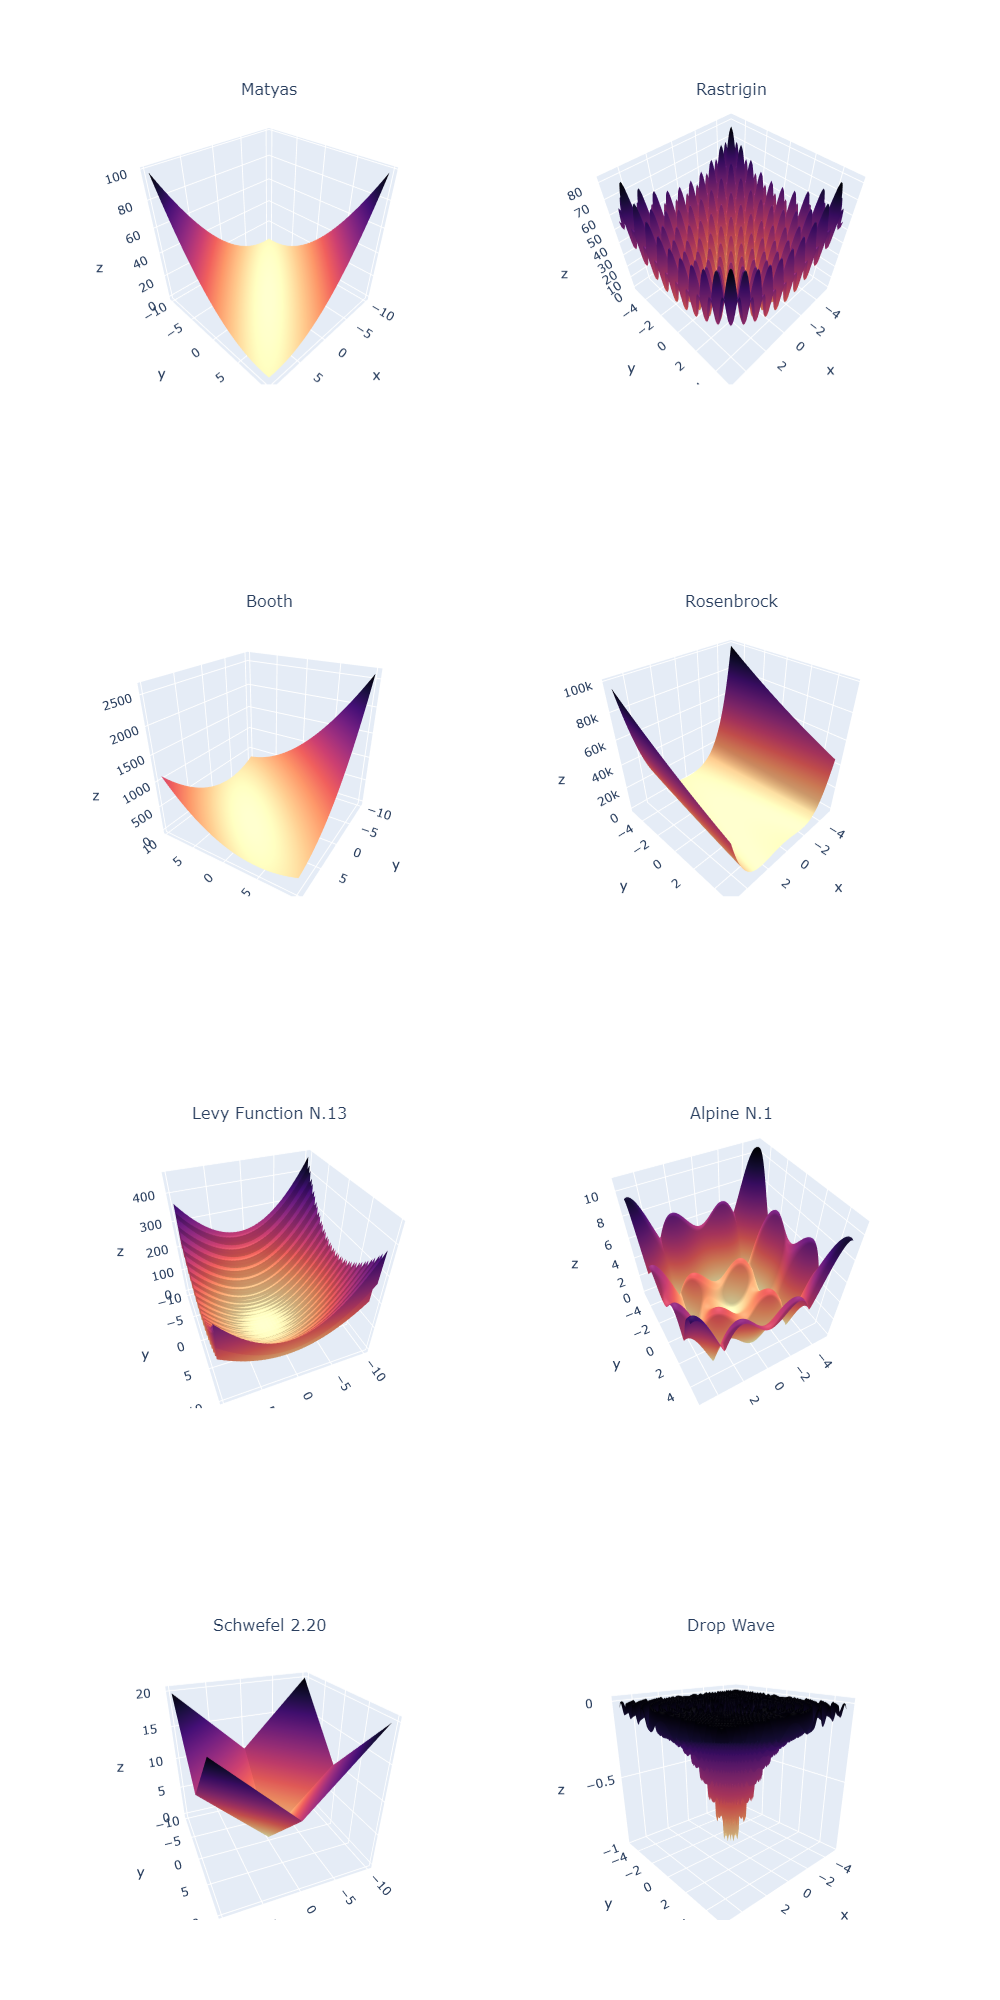

In [1]:
from IPython.display import Image
Image(filename="images/allplots.png")

To plot graphics like above I used plotly (the functions are defined below):

In [ ]:
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=4, cols=2,
                    specs=[[{'type': 'surface'}, {'type': 'surface'}],
                           [{'type': 'surface'}, {'type': 'surface'}],
                           [{'type': 'surface'}, {'type': 'surface'}],
                           [{'type': 'surface'}, {'type': 'surface'}]],
                    subplot_titles=("Matyas", "Rastrigin", "Booth", "Rosenbrock", "Levy Function N.13", "Alpine N.1",
                                    "Schwefel 2.20", "Drop Wave"))

X10, Y10 = np.meshgrid(np.arange(-10, 10, 0.2), np.arange(-10, 10, 0.2))

fig.add_trace(
    go.Surface(x=X10, y=Y10, z=Matyas([X10, Y10]), colorscale='magma_r', showscale=False),
    row=1, col=1
)

X5, Y5 = np.meshgrid(np.arange(-5.12, 5.12, 0.1), np.arange(-5.12, 5.12, 0.1))

fig.add_trace(
    go.Surface(x=X5, y=Y5, z=Rastrigin([X5, Y5]), colorscale='magma_r', showscale=False),
    row=1, col=2
)

fig.add_trace(
    go.Surface(z=Booth([X10, Y10]), x=X10, y=Y10, colorscale='magma_r', showscale=False),
    row=2, col=1
)

fig.add_trace(
    go.Surface(z=Rosenbrock([X5, Y5]), x=X5, y=Y5, colorscale='magma_r', showscale=False),
    row=2, col=2
)

fig.add_trace(
    go.Surface(z=Levy13([X10, Y10]), x=X10, y=Y10, colorscale='magma_r', showscale=False),
    row=3, col=1
)

fig.add_trace(
    go.Surface(z=Alpine1([X5, Y5]), x=X5, y=Y5, colorscale='magma_r', showscale=False),
    row=3, col=2
)

fig.add_trace(
    go.Surface(z=Schwefel220([X10, Y10]), x=X10, y=Y10, colorscale='magma_r', showscale=False),
    row=4, col=1
)

fig.add_trace(
    go.Surface(z=DropWave([X5, Y5]), x=X5, y=Y5, colorscale='magma_r', showscale=False),
    row=4, col=2
)

fig.update_layout(height=2000, width=1000)

Import the class with gsa and important packages

In [2]:
from gsa import Gsa

import pandas as pd
import numpy as np
import time
import copy
import plotly.graph_objects as go

Define the test functions and the bounds:

In [5]:
def Matyas(var):
    x, y = var
    return 0.26*(x**2 + y**2) - 0.48*(x*y)

def Rastrigin(var):
    x, y = var
    return 20 + x**2 - 10*np.cos(2*np.pi*x) + y**2 - 10*np.cos(2*np.pi*y)

def Rosenbrock(var):
    x, y = var
    return 100*((y - x**2)**2) + (1-x)**2

def Booth(var):
    x, y = var
    return (x + 2*y - 7)**2 + (2*x + y -5)**2

def Levy13(var):
    x, y = var
    return np.sin(2*np.pi*x)**2 + ((x-1)**2)*(1+np.sin(3*np.pi*y)**2) + ((y-1)**2)*(1+np.sin(2*np.pi*y)**2)

def Alpine1(var):
    x, y = var
    return np.abs(x*np.sin(x)+0.1*x) + np.abs(y*np.sin(y)+0.1*y)

def Schwefel220(var):
    x, y = var
    return np.abs(x)+np.abs(y)

def DropWave(var):
    x, y = var
    return (-1 - np.cos(12*np.sqrt(x**2+y**2)))/(0.5*(x**2+y**2) + 2)

bounds = [[-10,10], [-5.12,5.12]]
functions = [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]

### Test 1 <a class="anchor" id="test_1"></a>
In the first test we will see which number of initial population is the best. We will check N from 10 to 100 every 10. For each number of populations 30 values will be generated. From this we will get the average.

In [127]:
def test1(alg, low, up, f, n, nMean):
    start = time.time()
    opt = np.array([alg(N=n, b_low=low, b_up=up).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, n, f([x_mean,y_mean]), x_mean, y_mean, (end-start)/nMean]

In [128]:
values = []
for n in range(10, 110, 10):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test1(Gsa, b_low, b_up, f, n, 30))
    
gsaTest1 = pd.DataFrame(values, columns=['Algorithm','Function', 'Population','Value', 'x', 'y', 'time'])

In [129]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gsaTest1.loc[:, gsaTest1.columns != 'Algorithm'].groupby(['Function','Population']).min())

Value         x         y      time
Function    Population                                          
Alpine1     10            0.572761 -0.417722  0.639063  0.021908
            20            0.038563 -0.188839 -0.207500  0.083510
            30            0.333256  0.478881  0.209861  0.193965
            40            0.215762 -0.210915  0.396409  0.341927
            50            0.088494 -0.122317  0.248214  0.582835
            60            0.121896 -0.070289 -0.406089  0.790153
            70            0.181726  0.165860  0.327031  1.108515
            80            0.083376  0.034802 -0.338732  1.291741
            90            0.009439 -0.031870  0.048834  1.723405
            100           0.096157  0.136624 -0.310636  2.012219
Booth       10            0.020001  1.055148  2.901981  0.021542
            20            0.588907  1.475852  2.809751  0.095910
            30            0.256804  1.036115  2.745518  0.195904
            40            0.121243  0.748750  3.161973  0.351563
            50            0.076832  0.939518  2.929854  0.504899
            60            0.189491  0.803084  3.002810  0.816298
            70            0.297272  1.400170  2.637374  1.012434
            80            0.022964  1.042825  3.028451  1.336930
            90            0.082100  1.067520  3.067552  1.739299
            100           0.169141  0.712473  3.166253  2.004723
DropWave    10           -0.204441  0.155071  0.097638  0.022407
            20           -0.427584  0.045865  0.135071  0.091460
            30           -0.897523  0.052994 -0.011023  0.211573
            40           -0.488960  0.071049 -0.387564  0.332630
            50           -0.617215 -0.109850  0.014895  0.566497
            60           -0.017042 -0.220024  0.095415  0.701202
            70           -0.020194  0.067586  0.277701  1.038164
            80           -0.343208  0.326159 -0.170752  1.325284
            90           -0.841607 -0.035986 -0.057695  1.697005
            100          -0.603740 -0.112942 -0.006916  1.979453
Levy13      10            1.408109  1.252098  1.526677  0.022872
            20            0.061841  0.961729  1.054498  0.095712
            30            1.234272  1.230236  1.337161  0.218668
            40            0.055537  1.035172  0.930009  0.348255
            50            0.453057  1.110451  1.121170  0.507986
            60            0.207066  0.972933  1.307961  0.813029
            70            1.070602  0.782486  1.125708  1.014517
            80            0.407139  0.913020  1.250743  1.412076
            90            0.115051  1.045879  1.138097  1.669316
            100           0.223370  0.930564  1.146942  1.996194
Matyas      10            0.005384  0.108610  0.237960  0.022241
            20            0.023376 -0.658513 -0.768353  0.079719
            30            0.000298  0.055266  0.077400  0.209096
            40            0.010010 -0.455398 -0.331939  0.382186
            50            0.003007  0.190841  0.254761  0.509724
            60            0.016194  0.295958  0.051091  0.809051
            70            0.025519 -0.543034 -0.734778  0.987917
            80            0.000515  0.003876 -0.040887  1.426118
            90            0.000750 -0.080232 -0.118004  1.661499
            100           0.003957  0.185014  0.070010  2.047523
Rastrigin   10           37.966975  0.441565  0.405101  0.022340
            20            7.064530 -0.188897  0.062885  0.090458
            30            1.136243 -0.067683  0.034920  0.238594
            40           10.794577  0.102897 -0.229463  0.364170
            50           27.888440 -0.268427  0.363229  0.521342
            60            6.607243  0.000982 -0.194267  0.834235
            70            1.843610 -0.082439  0.051668  1.061149
            80           20.171240 -0.205685  0.295009  1.368007
            90            7.058426 -0.035467 -0.197668  1.700103
            100          19.344888 -0.135485  0.348383  2.055451

We expect to get 0 as the minimum for the all functions expect the Drop Wave function where we expect to receive -1.

##### 1. Alpine N.1     
We received values close to 0.01 for populations of size 90, but it took almost 2s. For population equals to 20 we got 0.03 in 0.08 s. So perfect population will be 20.

#####  2. Booth
We received values close to 0.02 for populations of size 10 and 80. As for the population of 10 we need 0.02 s and for 80 we need 1.3 s, then in further tests for the Booth function we will use the population of 10.

#####  3. Drop Wave function
The best value was achieved by the model with a population size of 30.

##### 4. Levy N.13
The population size from now on will be 40.

#####  5. Matyas function
The best value was achieved by the model with a population size of 30.

#####  6. Rastrigin
No model returned satisfactory results, but the closest model was one with a population equal to 30.

#####  7. Rosenbrock 
Again, no model returned satisfactory results, but the closest model was one with a population equal to 70.

#####  8. Schwefel 2.20 
The best value was achieved by the model with a population size of 90.

Now, we can make dictionary where will be saved the best parameters for each function.

In [131]:
gsaParam = {'Alpine1':{'N':20}, 
           'Booth':{'N':10},
           'DropWave':{'N':30},
           'Levy13':{'N':40},
           'Matyas':{'N':30},
           'Rastrigin':{'N':30},
           'Rosenbrock':{'N':70},
           'Schwefel220':{'N':90}
           }

### Test 2 <a class="anchor" id="test_2"></a>

In Test 2, we will examine how the number of iterations affects finding the minimum. As it was mentioned, there is a parameter that return best point from each iteration. So we'll run test2 with a number of iterations of 100. As before, this will be 30 times and from here we'll get the mean values.

In [137]:
def test2(alg, f, low, up, num_it, nMean, param):
    x = [[] for i in range(num_it)]
    y = [[] for i in range(num_it)]
    f_val = [[] for i in range(num_it)]
    for i in range(nMean):
        res = np.array(alg(N=param[f.__name__]['N'], b_low=low, b_up=up, num_it=num_it, return_all_best=True).optimize(f))
        for j in range(num_it):
            x[j].append(res[j][0])
            y[j].append(res[j][1])
            f_val[j].append(f(res[j]))
    x_mean = np.mean(x, axis=1)
    y_mean = np.mean(y, axis=1)
    f_mean = np.mean(f_val, axis=1)
    opt = [[alg.__name__, f.__name__, i, f_mean[i], x_mean[i], y_mean[i], param[f.__name__]['N']] for i in range(10, num_it, 5)]
    return opt

In [139]:
values = np.array([])
for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
    if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
        b_low, b_up = bounds[0]
    elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (
            f.__name__ == 'DropWave'):
        b_low, b_up = bounds[1]
    if len(values) != 0:
        values = np.append(values, test2(Gsa, f, b_low, b_up, 61, 30, gsaParam), axis=0)
    else:
        values = test2(Gsa, f, b_low, b_up, 61, 30, gsaParam)
    
gsaTest2 = pd.DataFrame(values, columns=['Algorithm','Function', 'Number of Iterations','Value', 'x', 'y','N'])

In [140]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gsaTest2.loc[:, gsaTest2.columns != 'Algorithm'].groupby(['Function','Number of Iterations']).min())

Value                     x  \
Function    Number of Iterations                                              
Alpine1     10                     0.8696601407867601   0.17143874217267807   
            15                      0.883346577537594  0.051267015742202486   
            20                     0.8856386213234985  0.051338384810634574   
            25                     0.8856104732555983   0.05130448143858376   
            30                     0.8856520056065393  0.051295146692613196   
            35                     0.8856717246065848  0.051293318019934996   
            40                     0.8856828146923058   0.05129251724835907   
            45                     0.8856925939390623  0.051292957994565465   
            50                     0.8856996173852265  0.051290958157471644   
            55                      0.885707229875604   0.05128939057740043   
            60                     0.8857150561888408  0.051288672821508036   
Booth       10                     35.074187004735215     0.424398962505863   
            15                     35.043851568723525    0.4279129303262656   
            20                      35.03836130403748   0.42857155826133614   
            25                     35.037448863125185   0.42866886622651634   
            30                     35.037330161503796    0.4287008349397192   
            35                      35.03725090140106   0.42871047214984814   
            40                      35.03722545147071   0.42871588700009944   
            45                     35.037194918374595    0.4287201302144991   
            50                     35.037183216315725    0.4287247913245339   
            55                      35.03714803597763   0.42872897328055515   
            60                      35.03712905871005    0.4287329066044427   
DropWave    10                    -0.5210693200365515  -0.09920678605161551   
            15                    -0.5073909373814639  -0.26144752877014993   
            20                    -0.5081329661636773  -0.26000180493793756   
            25                    -0.5081228964697435  -0.26442985045689404   
            30                    -0.5081563439126696   -0.2644376289434904   
            35                    -0.5081607460798889  -0.26444140144678335   
            40                     -0.508166106484572   -0.2644433451488944   
            45                     -0.508171074840642  -0.26444465334635775   
            50                    -0.5081725202067988  -0.26444644133527323   
            55                    -0.5081756912947533   -0.2644484706253674   
            60                    -0.5081765781186824  -0.26444920606057415   
Levy13      10                      4.895201260288981    1.2665497933869727   
            15                      4.874900057576329    1.2666670510319251   
            20                      4.869826733634936    1.2667197660815275   
            25                      4.869211238125694    1.2667245929284836   
            30                      4.869035345588226     1.266720610825995   
            35                      4.868967197449373    1.2667195279045653   
            40                      4.868934447519018    1.2667195041016197   
            45                      4.868913269331176    1.2667198307800571   
            50                      4.868885288459672     1.266719940988068   
            55                      4.868863246302513     1.266719633790817   
            60                      4.868846688846938    1.2667192918974968   
Matyas      10                     0.3621881652163895   0.28087647492011797   
            15                    0.36205761808001924    0.2822392471672911   
            20                     0.3619721957406942   0.28254602325505457   
            25                     0.3619632726183125    0.2825787026224561   
            30                     0.3619644091969639   0.28258658244469814   
            35     

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

rows=4
cols=2
functions = [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Alpine1, Schwefel220, DropWave]
fig = make_subplots(rows=rows, cols=cols,
                    subplot_titles=("Alpine1", "Booth", "DropWave", "Levy13", "Matyas", "Rastrigin", "Rosenbrock",
                                    "Schwefel220"))

i=0
j=0
for f in ["Alpine1", "Booth", "DropWave", "Levy13", "Matyas", "Rastrigin", "Rosenbrock",  "Schwefel220"]:
    x = gsaTest2[gsaTest2['Function']==f]['Number of Iterations'].astype(int)
    y = gsaTest2[gsaTest2['Function']==f]['Value'].astype(float)
    fig.add_trace(
        go.Scatter(x=x, y=y, mode='lines+markers', name=f, line=dict(color='gray'), marker=dict(size=16, color=y,
                                                                            colorscale='Magma_r', showscale=False),
                  showlegend=False),
        row=int( (i%rows) + 1), col= (j % cols) + 1
    )
    i+=0.5
    j+=1


fig.update_layout(height=2000, width=1000)

<img src='images/gsaNumIt.png'>

Again, we will check the results for each function.

##### 1. Alpine N.1     
The best result we received if number of iterations is equal to 10.

#####  2. Booth
As the repetitions increase, the quality of the solution increases. But after 40 repetitions it slows down, so we can decide that 40 is perfect.

#####  3. Drop Wave function
The best is the model with number of iterations equal 10.

##### 4. Levy N.13
It's very similar situation like in Booth. The number of iterations from now on will be 40.

#####  5. Matyas function
Like in Booth function, the best is the model with number of iterations equal 40.

#####  6. Rastrigin
Despite the fact that after 15 iterations the model gets better, it is still worse than for 10 iterations.

#####  7. Rosenbrock 
The best is the model with number of iterations equal 15.

#####  8. Schwefel 2.20 
The best value was achieved by the model with number equal 40.


As we get the result we can fill the dictionary

In [143]:
gsaParam['Alpine1']['num_it'] = 10
gsaParam['Booth']['num_it'] = 40
gsaParam['DropWave']['num_it'] = 10
gsaParam['Levy13']['num_it'] = 40
gsaParam['Matyas']['num_it'] = 40
gsaParam['Rastrigin']['num_it'] = 10
gsaParam['Rosenbrock']['num_it'] = 15
gsaParam['Schwefel220']['num_it'] = 40
gsaParam

{'Alpine1': {'N': 20, 'num_it': 10},
 'Booth': {'N': 10, 'num_it': 40},
 'DropWave': {'N': 30, 'num_it': 10},
 'Levy13': {'N': 40, 'num_it': 40},
 'Matyas': {'N': 30, 'num_it': 40},
 'Rastrigin': {'N': 30, 'num_it': 10},
 'Rosenbrock': {'N': 70, 'num_it': 15},
 'Schwefel220': {'N': 90, 'num_it': 40}}

### Test 3 <a class="anchor" id="test_3"></a>

In test 3 we will see how decreasing the population every iteration affects the minimum returned.

specify as parameter kbest a number less than 1, which indicates what percentage of individuals will be left every iteration.

In [148]:
def test3(alg, f, low, up, kbest, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], num_it=param[f.__name__]['num_it'], b_low=low, b_up=up, kbest=kbest).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, kbest, f([x_mean,y_mean]), x_mean, y_mean, param[f.__name__]['N'], param[f.__name__]['num_it'],(end-start)/nMean]

In [150]:
values = []
for kbest in range(6, 11, 1):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test3(Gsa, f, b_low, b_up, kbest/10, 30, gsaParam))
    
gsaTest3 = pd.DataFrame(values, columns=['Algorithm','Function', 'kbest','Value', 'x', 'y', 'Population', 'Number of Iterations', 'time'])

In [158]:
gsaTest3 = pd.read_excel('gsa_new.xlsx', sheet_name='Test 3')

In [159]:
gsaTest3.loc[:, gsaTest3.columns != 'Algorithm'].groupby(['Function','kbest']).min()

Value         x         y  Population  \
Function    kbest                                               
Alpine1     0.6      0.208909  0.197285  0.344125          20   
            0.7      0.110765  0.102954  0.255110          20   
            0.8      0.040989  0.155452 -0.083656          20   
            0.9      0.406927 -0.624245  0.278618          20   
            1.0      0.172156  0.069289  0.356963          20   
Booth       0.6      3.236658  1.646182  1.778063          10   
            0.7      1.193082  1.813205  2.326041          10   
            0.8      1.252340  1.744913  2.178891          10   
            0.9      0.246898  1.246378  2.968810          10   
            1.0      1.390458  1.836404  2.492883          10   
DropWave    0.6     -0.450670  0.643052 -0.122799          30   
            0.7     -0.101029  0.272114 -0.161450          30   
            0.8     -0.006558  0.262526 -0.083347          30   
            0.9     -0.011597 -0.241113  0.035298          30   
            1.0     -0.067148  0.221301  0.211343          30   
Levy13      0.6      1.101259  0.736975  0.921761          40   
            0.7      0.443731  1.113885  1.013194          40   
            0.8      1.083253  1.323613  1.266720          40   
            0.9      0.819400  1.342399  0.983725          40   
            1.0      1.058620  0.772647  0.927256          40   
Matyas      0.6      0.009918  0.334715  0.455841          30   
            0.7      0.047033 -1.090132 -0.934877          30   
            0.8      0.015476 -0.088717  0.159685          30   
            0.9      0.000483  0.106326  0.084475          30   
            1.0      0.007198 -0.134629  0.033850          30   
Rastrigin   0.6      4.978066 -0.151664 -0.061788          30   
            0.7     33.523224  0.324452 -0.419019          30   
            0.8     10.374275 -0.251994 -0.030623          30   
            0.9     34.088194  0.366011 -0.376823          30   
            1.0     18.200126  0.300246  0.166252          30   
Rosenbrock  0.6    154.580613  0.438088  1.433955          70   
            0.7    120.326012  0.548071  1.396383          70   
            0.8    298.333795  0.103036  1.735520          70   
            0.9    141.765291  0.314046  1.287300          70   
            1.0    183.636128  0.331177  1.463151          70   
Schwefel220 0.6      0.158578 -0.130408  0.028170          90   
            0.7      0.355234 -0.085556 -0.269678          90   
            0.8      0.291978 -0.222626  0.069352          90   
            0.9      0.363007 -0.362126  0.000881          90   
            1.0      0.359257 -0.299679  0.059578          90   

                   Number of Iterations      time  
Function    kbest                                  
Alpine1     0.6                      10  0.007811  
            0.7                      10  0.009177  
            0.8                      10  0.011977  
            0.9                      10  0.020232  
            1.0                      10  0.048378  
Booth       0.6                      40  0.002853  
            0.7                      40  0.002398  
            0.8                      40  0.003646  
            0.9                      40  0.005207  
            1.0                      40  0.047541  
DropWave    0.6                      10  0.015946  
            0.7                      10  0.019090  
            0.8                      10  0.027828  
            0.9                      10  0.045527  
            1.0                      10  0.106203  
Levy13      0.6                      40  0.031388  
            0.7                      40  0.037575  
            0.8                      40  0.052413  
            0.9                      40  0.087186  
            1.0                      40  0.704295  
Matyas      0.6                      40  0.016648  
            0.7                      40  0.018947  
            0.8                      40  0.02

##### 1. Alpine N.1     
The best result we got if in every iteration stays 80% of population.

#####  2. Booth
The best result we got if in every iteration stays 90% of population.

#####  3. Drop Wave function
We got the best result if in every iteration stays 60% of population.

##### 4. Levy N.13
We got the best result if in every iteration stays 70% of population.

#####  5. Matyas function
If in every iteration stays 90% of population, then we will get the best result.

#####  6. Rastrigin
The best result we got if in every iteration stays 60% of population.

#####  7. Rosenbrock 
Again for Rosenbrock we didn't get satisfying result, but the model with 70% population left looks the best.

#####  8. Schwefel 2.20 
We got the best result if in every iteration stays 60% of population.

In [160]:
gsaParam['Alpine1']['kbest'] = 0.8
gsaParam['Booth']['kbest'] = 0.9
gsaParam['DropWave']['kbest'] = 0.6
gsaParam['Levy13']['kbest'] = 0.7
gsaParam['Matyas']['kbest'] = 0.9
gsaParam['Rastrigin']['kbest'] = 0.6
gsaParam['Rosenbrock']['kbest'] = 0.7
gsaParam['Schwefel220']['kbest'] = 0.6
gsaParam

{'Alpine1': {'N': 20, 'num_it': 10, 'kbest': 0.8},
 'Booth': {'N': 10, 'num_it': 40, 'kbest': 0.9},
 'DropWave': {'N': 30, 'num_it': 10, 'kbest': 0.6},
 'Levy13': {'N': 40, 'num_it': 40, 'kbest': 0.7},
 'Matyas': {'N': 30, 'num_it': 40, 'kbest': 0.9},
 'Rastrigin': {'N': 30, 'num_it': 10, 'kbest': 0.6},
 'Rosenbrock': {'N': 70, 'num_it': 15, 'kbest': 0.7},
 'Schwefel220': {'N': 90, 'num_it': 40, 'kbest': 0.6}}

### Test 4 <a class="anchor" id="test_4"></a>

In test 4 we will check how the value of the parameter G0 affects finding the minimum. Of course we will use use the parameter values we found in previous tests.

In [161]:
def test4(alg, f, low, up, G0, nMean, param):
    start = time.time()
    opt = np.array([alg(N=param[f.__name__]['N'], num_it=param[f.__name__]['num_it'], kbest=param[f.__name__]['kbest'], b_low=low, b_up=up, G0=G0).optimize(f) for j in range(nMean)])
    end = time.time()
    x_mean = np.mean(opt[:,0])
    y_mean = np.mean(opt[:,1])
    return [alg.__name__, f.__name__, G0, f([x_mean,y_mean]), x_mean, y_mean, param[f.__name__]['N'], param[f.__name__]['num_it'], param[f.__name__]['kbest'], (end-start)/nMean]

In [166]:
values = []
for G0 in range(1, 31, 2):
    for f in [Matyas, Rastrigin, Booth, Rosenbrock, Levy13, Schwefel220, Alpine1, DropWave]:
        if (f.__name__ == 'Matyas') | (f.__name__ == 'Booth') | (f.__name__ == 'Levy13') | (f.__name__ == 'Schwefel220'):
            b_low, b_up = bounds[0]
        elif (f.__name__ == 'Rastrigin') | (f.__name__ == 'Rosenbrock') | (f.__name__ == 'Alpine1') | (f.__name__ == 'DropWave'):
            b_low, b_up = bounds[1]
        values.append(test4(Gsa, f, b_low, b_up, G0, 30, gsaParam))
    
gsaTest4 = pd.DataFrame(values, columns=['Algorithm','Function', 'G0','Value', 'x', 'y', 'Population', 'Number of Iterations', 'kbest','time'])

In [167]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gsaTest4.loc[:, gsaTest4.columns != 'Algorithm'].groupby(['Function', 'G0']).min())

Value         x         y  Population  \
Function    G0                                               
Alpine1     1     0.017848  0.031100  0.077582          20   
            3     0.299452 -0.555363 -0.307196          20   
            5     0.014724  0.072065 -0.036894          20   
            7     0.476883  0.635899 -0.246846          20   
            9     0.177676 -0.482050 -0.040233          20   
            11    0.112012 -0.329819  0.151899          20   
            13    0.282614 -0.437464 -0.436698          20   
            15    0.010221  0.050151  0.022054          20   
            17    0.234308 -0.169313  0.430501          20   
            19    0.239193 -0.126150  0.444874          20   
            21    0.242300 -0.259875 -0.514232          20   
            23    0.502045  0.080200  0.673637          20   
            25    1.289122  0.305849  1.151191          20   
            27    0.298931  0.016698  0.507102          20   
            29    0.606121 -0.353629  0.698489          20   
Booth       1     1.228942  0.279228  3.334205          10   
            3     0.132248  0.968417  2.863741          10   
            5     2.576171  1.018667  2.267355          10   
            7     5.602419  1.140661  3.942630          10   
            9     0.478426  1.239741  2.534357          10   
            11    1.832244  1.966922  2.053631          10   
            13    0.922816  0.553192  3.021748          10   
            15    1.839123  1.210198  2.238615          10   
            17    0.133053  0.745282  3.260812          10   
            19    1.060840  0.821839  3.590570          10   
            21    0.700210  1.259007  2.452366          10   
            23    0.099700  1.199800  2.914785          10   
            25    0.261501  0.625566  3.256794          10   
            27    0.120270  0.890969  2.946603          10   
            29    0.309008  0.586944  3.310951          10   
DropWave    1    -0.552296  0.282602  0.290442          30   
            3    -0.800545  0.398062 -0.221386          30   
            5    -0.748184 -0.405286 -0.439306          30   
            7    -0.692027  0.075580  0.061994          30   
            9    -0.712714  0.035626 -0.434208          30   
            11   -0.284739 -0.322442 -0.604943          30   
            13   -0.242603  0.317621  0.144786          30   
            15   -0.028857 -0.468931  0.667987          30   
            17   -0.894925 -0.314292  0.457964          30   
            19   -0.000759  1.314452  0.010535          30   
            21   -0.931522  0.117185 -0.518968          30   
            23   -0.602183  0.106042  1.120911          30   
            25   -0.072792  0.275647 -0.137146          30   
            27   -0.879755  0.032923  0.048748          30   
            29   -0.001166 -0.160466  0.199545          30   
Levy13      1     0.225242  1.077077  0.959747          40   
            3     1.266903  1.237053  0.628017          40   
            5     1.104228  0.760188  0.900338          40   
            7     1.311714  1.243230  0.571508          40   
            9     1.039772  0.716359  1.020328          40   
            11    0.182663  0.981392  0.703333          40   
            13    1.035392  0.795491  1.143426          40   
            15    0.093093  0.977879  0.803573          40   
            17    0.889746  1.160396  1.264699          40   
            19    0.369683  1.101728  1.042345          40   
            21    0.673173  0.593371  1.343650          40   
            23    1.033160  1.194983  1.199118          40   
            25    1.190332  1.251110  1.189936          40   
            27    1.083302  0.789510  1.175552          40   
            29    1.020225  1.165822  0.542210          40   
Matyas      1     0.003068  0.020290  0.127074          30   
            3     0.006944 -0.314801 -0.400349          30   
            5     0.017863 -0.390945 -0.575568       

##### 1. Alpine N.1     
We got the best result for the G0 equals 15.

#####  2. Booth
We got the best result for the G0 equals 23.

#####  3. Drop Wave function
Only one model achieve outstanding result and it's for G0 equals 27.

##### 4. Levy N.13
We got the best result for the G0 equals 15.

#####  5. Matyas function
One model achieve outstanding result and it's for G0 equals 19.

#####  6. Rastrigin
For Rastrigin function, we see that a well-chosen value for the parameter G0 is important. The perfect value is 21.

#####  7. Rosenbrock 
Again for Rosenbrock we didn't get satisfying result, but the model with G0 equals to 7 seems the best.

#####  8. Schwefel 2.20 
One model achieve outstanding result and it's for G0 equals 7.



As we get the result we can fill the dictionary

In [170]:
gsaParam['Alpine1']['G0'] = 15
gsaParam['Booth']['G0'] = 23
gsaParam['DropWave']['G0'] = 27
gsaParam['Levy13']['G0'] = 15
gsaParam['Matyas']['G0'] = 19
gsaParam['Rastrigin']['G0'] = 21
gsaParam['Rosenbrock']['G0'] = 7
gsaParam['Schwefel220']['G0'] = 7
gsaParam

{'Alpine1': {'N': 20, 'num_it': 10, 'kbest': 0.8, 'G0': 15},
 'Booth': {'N': 10, 'num_it': 40, 'kbest': 0.9, 'G0': 23},
 'DropWave': {'N': 30, 'num_it': 10, 'kbest': 0.6, 'G0': 27},
 'Levy13': {'N': 40, 'num_it': 40, 'kbest': 0.7, 'G0': 15},
 'Matyas': {'N': 30, 'num_it': 40, 'kbest': 0.9, 'G0': 19},
 'Rastrigin': {'N': 30, 'num_it': 10, 'kbest': 0.6, 'G0': 21},
 'Rosenbrock': {'N': 70, 'num_it': 15, 'kbest': 0.7, 'G0': 7},
 'Schwefel220': {'N': 90, 'num_it': 40, 'kbest': 0.6, 'G0': 7}}

## Summary <a class="anchor" id="sum"></a>

Now we can check if our models works better than the initial one.

In [191]:
regular = {}
revised = {}
for f in [Alpine1, Booth, DropWave, Levy13, Matyas, Rastrigin, Rosenbrock,  Schwefel220]:
    regular[f.__name__] = Gsa().optimize(f)
    revised[f.__name__] = Gsa(N=gsaParam[f.__name__]['N'],num_it=gsaParam[f.__name__]['num_it'],G0=gsaParam[f.__name__]['G0'],kbest=gsaParam[f.__name__]['kbest']).optimize(f)
    print(f.__name__)
    print(regular[f.__name__], "--->", f(regular[f.__name__]))
    print(revised[f.__name__], "--->", f(revised[f.__name__]))
    print("___________________________________________________________________________________________")

Alpine1
[-6.52960808  3.6876695 ] ---> 2.4862303293418577
[-9.2903749  -0.28535332] ---> 0.36765201826058674
___________________________________________________________________________________________
Booth
[ 4.75054946 -1.29443473] ---> 33.69203561567945
[3.9690499  1.32397727] ---> 18.31198657067305
___________________________________________________________________________________________
DropWave
[2.65410632 0.19184109] ---> -0.3374368208257777
[1.27361078 6.29195166] ---> -0.04133341056186012
___________________________________________________________________________________________
Levy13
[ 2.47903877 -1.83047786] ---> 18.534248251313123
[0.87532347 3.00062458] ---> 4.516072722296462
___________________________________________________________________________________________
Matyas
[0.6458808 1.3402581] ---> 0.15998743523928877
[1.67844991 1.56689308] ---> 0.10843374284558704
___________________________________________________________________________________________
Rastrigin
[-2.


Thanks to new parameters values each model find better minimum.

As we can conclude, each function requiers different parameters values. Also some algorithms may simply not be suitable for a given function.

These models will be used in final Comparison notebook, where three algorithms will be compared.